In [52]:
#loading the required packages
#show the plots in the notebook:
%matplotlib inline 

#this is a great trick to increase resolution of plots:
%config InlineBackend.figure_format = 'retina'

#numpy and pandas for data manipulation and computation
import numpy as np
import pandas as pd

#data visualization:
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn is the main machine learning package we will use
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn import metrics


#set the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [53]:
def quantize_image(img, n_clusters):
    """
    Clusters the pixels in a image and returns the quantized image
    
    img - a 3D numpy array
    n_clusters - the number of clusters or colors in the final image
    """
        
    #use float.64 to make sure the image is displayed correctly:
    img = np.array(img, dtype=np.float64) / 255
    
    
    #reshape the data for clustering:
    m,l,k = img.shape[0], img.shape[1], img.shape[2]
    df = pd.DataFrame(img.reshape(m*l, k))
    df.columns = ["R", "G", "B"]
        
    #defining the model:
    kmeans = KMeans(n_clusters=n_clusters)
    
    #here only fit on a sample of the data for speed 
    #results are usually comparable to when fit on entire data
    kmeans.fit(df.sample(5000))
    
    #clusters predicted on all the data:
    df["clusters"] = kmeans.predict(df)

    
    centers = pd.DataFrame(kmeans.cluster_centers_)

    centers["clusters"] = range(n_clusters)

    df["ind"] = df.index #this is to keep things from getting shuffled.
    df = df.merge(centers) #merge back with the pixel values of the centers
    df = df.sort_values("ind") #reorder in the original order
    df = df.drop("ind", 1) #drop the index

    quant_img = df.iloc[:,4:7].values

    #reshape to original form:
    quant_img = quant_img.reshape(img.shape[0], img.shape[1], img.shape[2])

    quant_img = quant_img*255
    quant_img = np.array(quant_img, dtype=np.float64)
    
    return quant_img

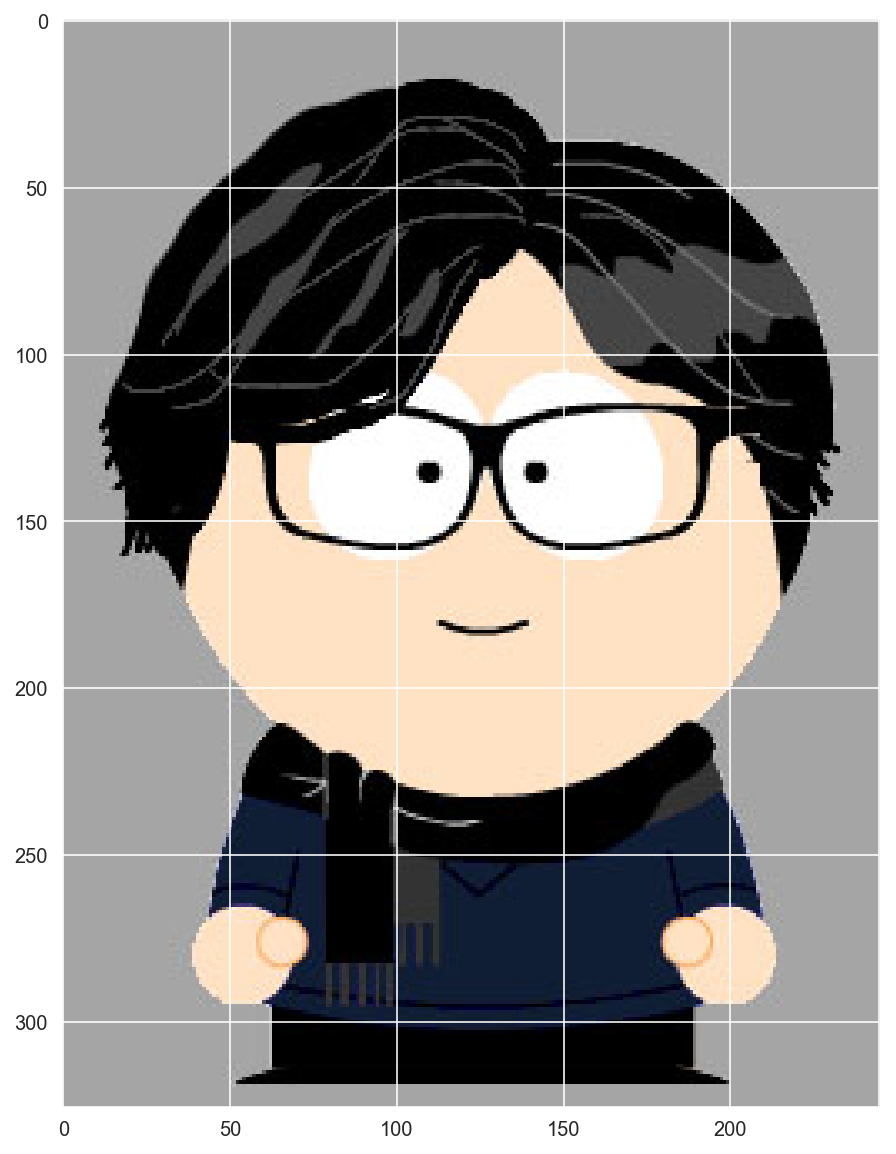

In [18]:
sns.set_style(style = 'darkgrid')
#image path:
img = plt.imread('mooshtabaa.jpg')

#this is to change image size:
rcParams['figure.figsize'] = 10, 10
plt.imshow(img)

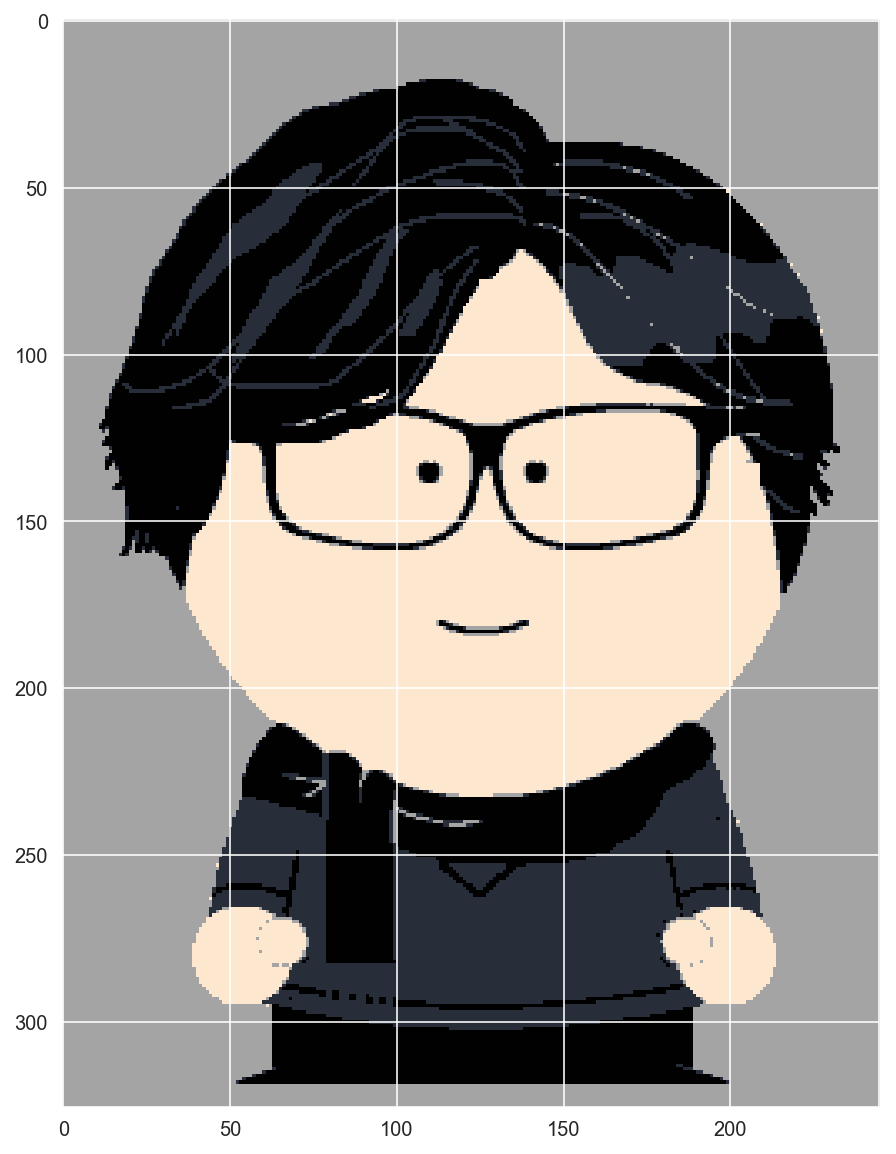

In [54]:
plt.imshow(quantize_image(img, n_clusters = 4))

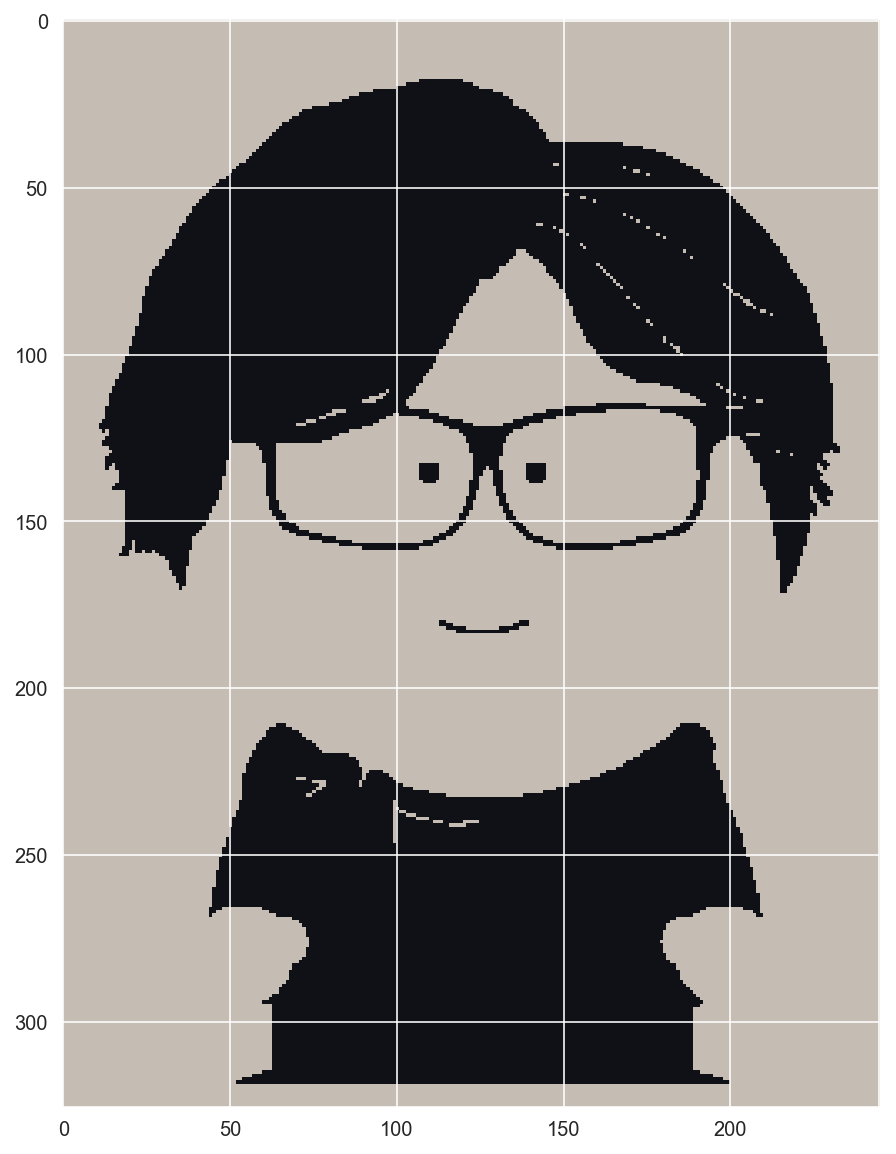

In [55]:
plt.imshow(quantize_image(img, n_clusters = 2))

In [56]:
pwd

'C:\\Users\\mojta\\OneDrive - University of Calgary\\My PhD-Research\\By Job\\Github Project\\Machine Learning Projects'